INSTALL REQUIRED MODULES

In [ ]:
!python -m pip install seaborn plotly scikit-learn

Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


c:\Users\SHIVAM\PycharmProjects\GlobalEnvironment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\SHIVAM\PycharmProjects\GlobalEnvironment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\SHIVAM\PycharmProjects\GlobalEnvironment\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading the dataset\
SKIP THIS STEP IF YOU ARE ON LOCAL COMPUTER


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [14]:
%cd ~/../gdrive/MyDrive/Space\ Astronomy\ Project
%ls

/gdrive/.shortcut-targets-by-id/1fJo9ICqpCgBYXOv0tRn_FWdQSQ92pUP_/Space Astronomy Project


In [2]:
df = pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


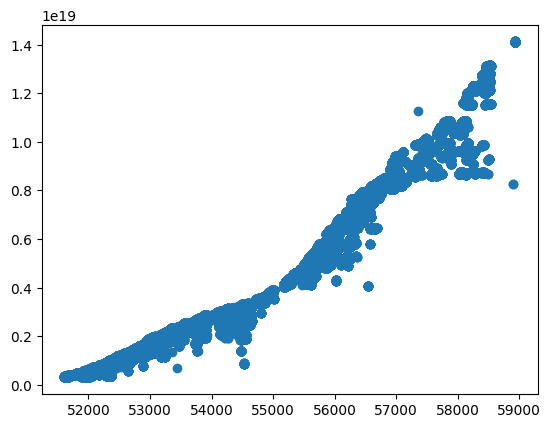

In [3]:
plt.scatter(df["MJD"], df["spec_obj_ID"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [5]:
ex.pie(df,names='class',title='Propotion Of Different Class',hole=0.33)

In [6]:
df["class"]=[0 if i == "GALAXY" else
              1 if i == "STAR" else 
              2 for i in df["class"]]

Text(0.5, 1.0, 'QSR')

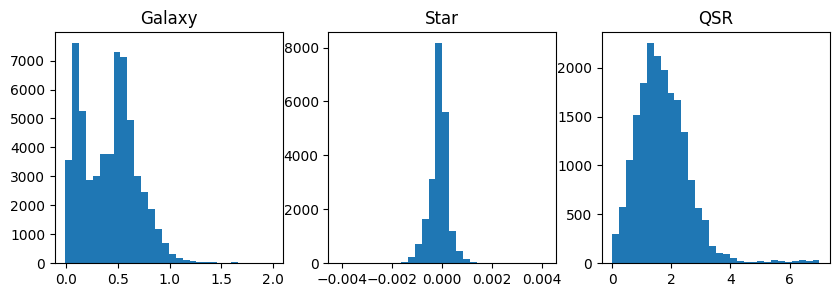

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].hist(df[df["class"] == 0].redshift, bins = 30)
# print(hx, hy)
ax[0].set_title("Galaxy")

ax[1].hist(df[df["class"] == 1].redshift, bins = 30)
ax[1].set_title("Star")

ax[2].hist(df[df["class"] == 2].redshift, bins = 30)
ax[2].set_title("QSR")


Text(0.5, 1.0, 'QSR')

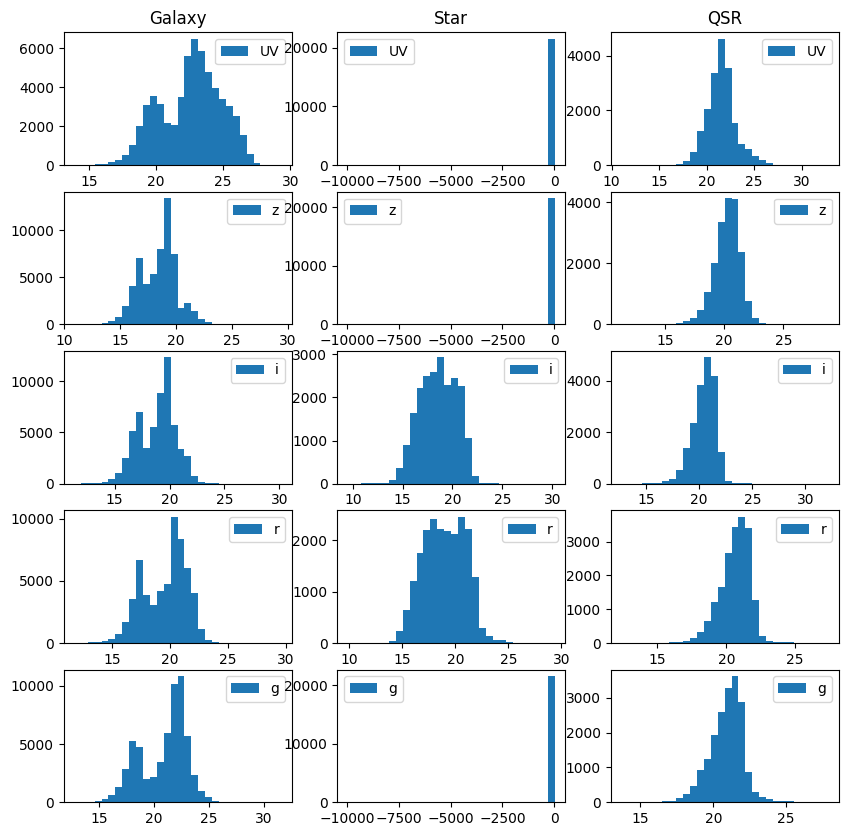

In [74]:
fig, ax = plt.subplots(5, 3, figsize=(10, 10))
ax[0][0].hist(df[df["class"] == 0].u, bins=30, label = "UV")
ax[1][0].hist(df[df["class"] == 0].z, bins=30, label="z")
ax[2][0].hist(df[df["class"] == 0].i, bins=30, label = "i")
ax[3][0].hist(df[df["class"] == 0].r, bins=30, label = "r")
ax[4][0].hist(df[df["class"] == 0].g, bins=30, label = "g")

ax[0][0].legend()
ax[1][0].legend()
ax[2][0].legend()
ax[3][0].legend()
ax[4][0].legend()

ax[0][0].set_title("Galaxy")


ax[0][1].hist(df[df["class"] == 1].u, bins=30, label = "UV")
ax[1][1].hist(df[df["class"] == 1].z, bins=30, label="z")
ax[2][1].hist(df[df["class"] == 1].i, bins=30, label = "i")
ax[3][1].hist(df[df["class"] == 1].r, bins=30, label = "r")
ax[4][1].hist(df[df["class"] == 1].g, bins=30, label = "g")

ax[0][1].legend()
ax[1][1].legend()
ax[2][1].legend()
ax[3][1].legend()
ax[4][1].legend()
ax[0][1].set_title("Star")


ax[0][2].hist(df[df["class"] == 2].u, bins=30, label = "UV")
ax[1][2].hist(df[df["class"] == 2].z, bins=30, label="z")
ax[2][2].hist(df[df["class"] == 2].i, bins=30, label = "i")
ax[3][2].hist(df[df["class"] == 2].r, bins=30, label = "r")
ax[4][2].hist(df[df["class"] == 2].g, bins=30, label = "g")

ax[0][2].legend()
ax[1][2].legend()
ax[2][2].legend()
ax[3][2].legend()
ax[4][2].legend()

ax[0][2].set_title("QSR")


Text(0.5, 1.0, 'QSR')

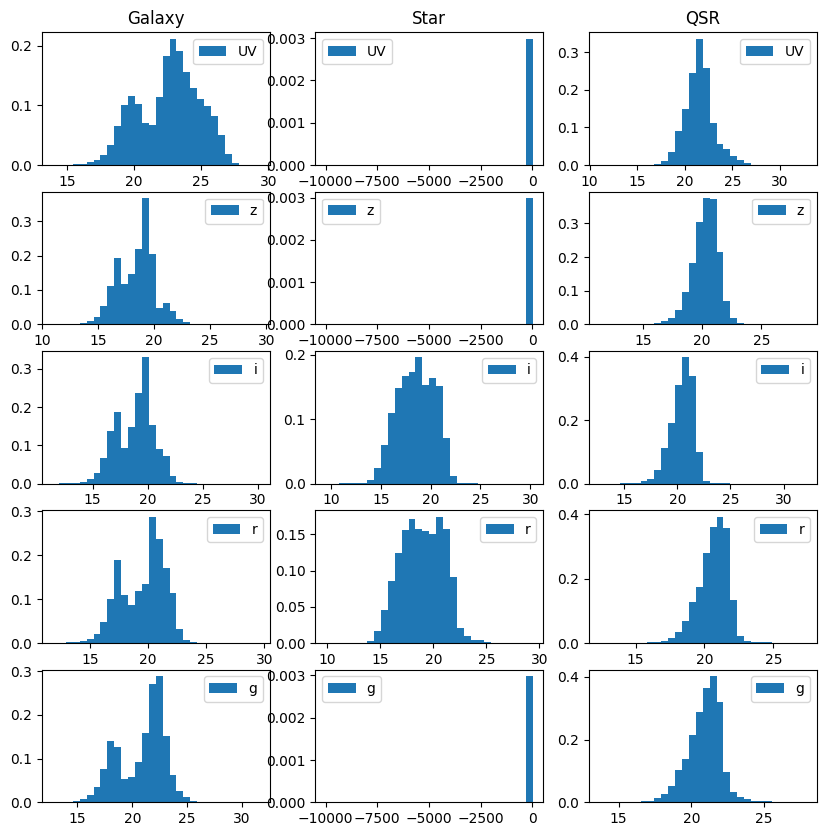

In [90]:
# NORMALIZED PLOTS

fig, ax = plt.subplots(5, 3, figsize=(10, 10))
ax[0][0].hist(df[df["class"] == 0].u, bins=30, density = "True", label = "UV")
ax[1][0].hist(df[df["class"] == 0].z, bins=30, density = "True",  label="z")
ax[2][0].hist(df[df["class"] == 0].i, bins=30, density = "True", label = "i")
ax[3][0].hist(df[df["class"] == 0].r, bins=30, density = "True", label = "r")
ax[4][0].hist(df[df["class"] == 0].g, bins=30, density = "True", label = "g")

ax[0][0].legend()
ax[1][0].legend()
ax[2][0].legend()
ax[3][0].legend()
ax[4][0].legend()

ax[0][0].set_title("Galaxy")


ax[0][1].hist(df[df["class"] == 1].u, bins=30, density = "True",  label = "UV")
ax[1][1].hist(df[df["class"] == 1].z, bins=30, density = "True", label="z")
ax[2][1].hist(df[df["class"] == 1].i, bins=30, density = "True", label = "i")
ax[3][1].hist(df[df["class"] == 1].r, bins=30, density = "True", label = "r")
ax[4][1].hist(df[df["class"] == 1].g, bins=30, density = "True", label = "g")

ax[0][1].legend()
ax[1][1].legend()
ax[2][1].legend()
ax[3][1].legend()
ax[4][1].legend()
ax[0][1].set_title("Star")


ax[0][2].hist(df[df["class"] == 2].u, bins=30, density = "True", label = "UV")
ax[1][2].hist(df[df["class"] == 2].z, bins=30, density = "True", label="z")
ax[2][2].hist(df[df["class"] == 2].i, bins=30, density = "True", label = "i")
ax[3][2].hist(df[df["class"] == 2].r, bins=30, density = "True", label = "r")
ax[4][2].hist(df[df["class"] == 2].g, bins=30, density = "True", label = "g")

ax[0][2].legend()
ax[1][2].legend()
ax[2][2].legend()
ax[3][2].legend()
ax[4][2].legend()

ax[0][2].set_title("QSR")


Text(0.5, 1.0, 'QSR')

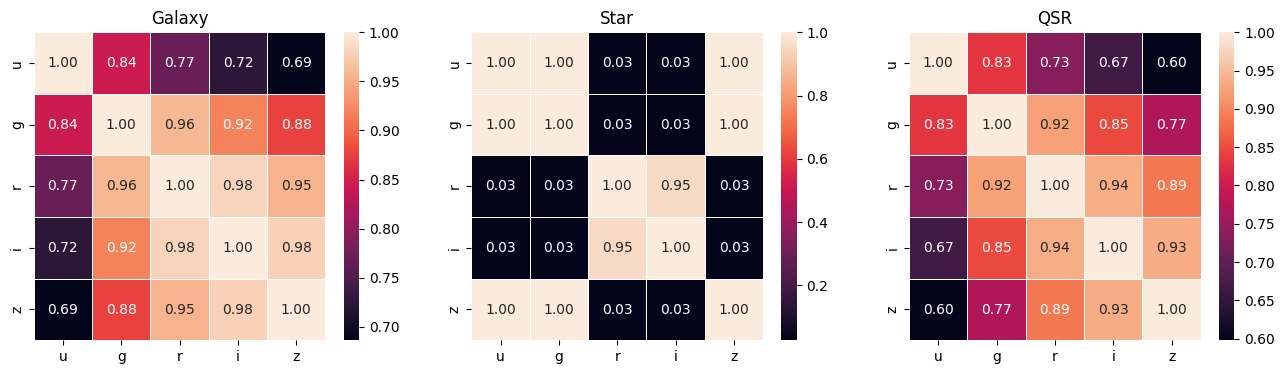

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
ax = sns.heatmap(df[df['class']==0][['u', 'g', 'r', 'i', 'z']].corr(method="pearson"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[0])
ax.set_title("Galaxy")

ax = sns.heatmap(df[df['class']==1][['u', 'g', 'r', 'i', 'z']].corr(method="pearson"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[1])
ax.set_title("Star")

ax = sns.heatmap(df[df['class']==2][['u', 'g', 'r', 'i', 'z']].corr(method="pearson"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[2])
ax.set_title("QSR")



Text(0.5, 1.0, 'QSR')

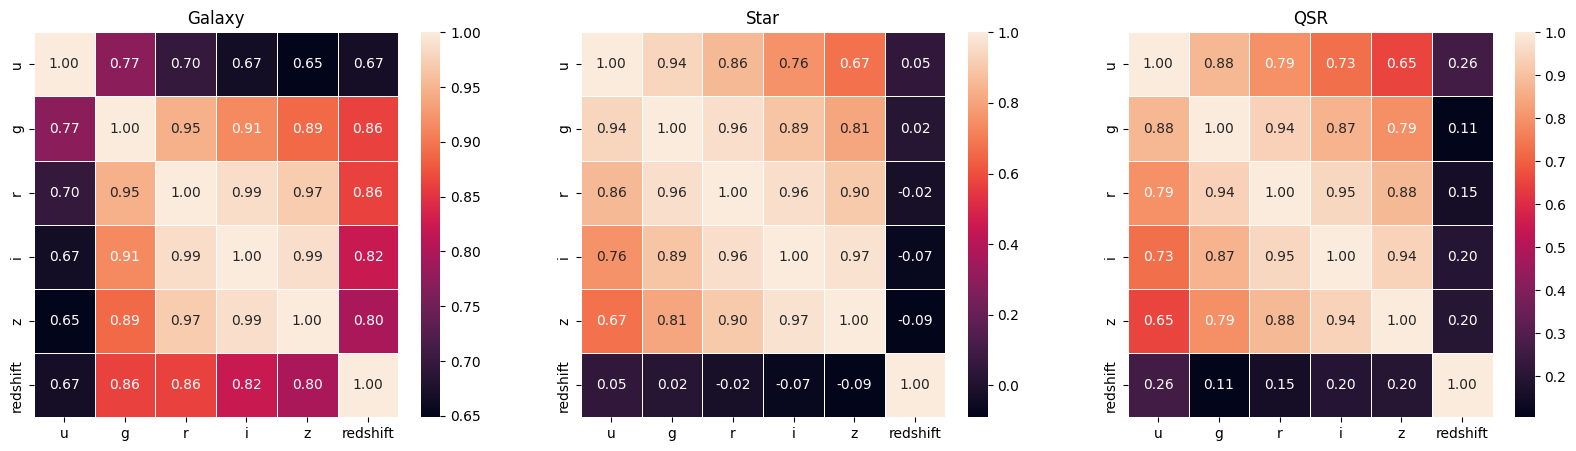

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
ax = sns.heatmap(df[df['class']==0][['u', 'g', 'r', 'i', 'z', 'redshift']].corr(method="spearman"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[0])
ax.set_title("Galaxy")

ax = sns.heatmap(df[df['class']==1][['u', 'g', 'r', 'i', 'z', 'redshift']].corr(method="spearman"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[1])
ax.set_title("Star")

ax = sns.heatmap(df[df['class']==2][['u', 'g', 'r', 'i', 'z', 'redshift']].corr(method="spearman"), annot=True, linewidths=0.5, fmt= '.2f',ax=axes[2])
ax.set_title("QSR")

In [24]:
corr_p = df.corr(method='pearson')
corr_s = df.corr(method='spearman')

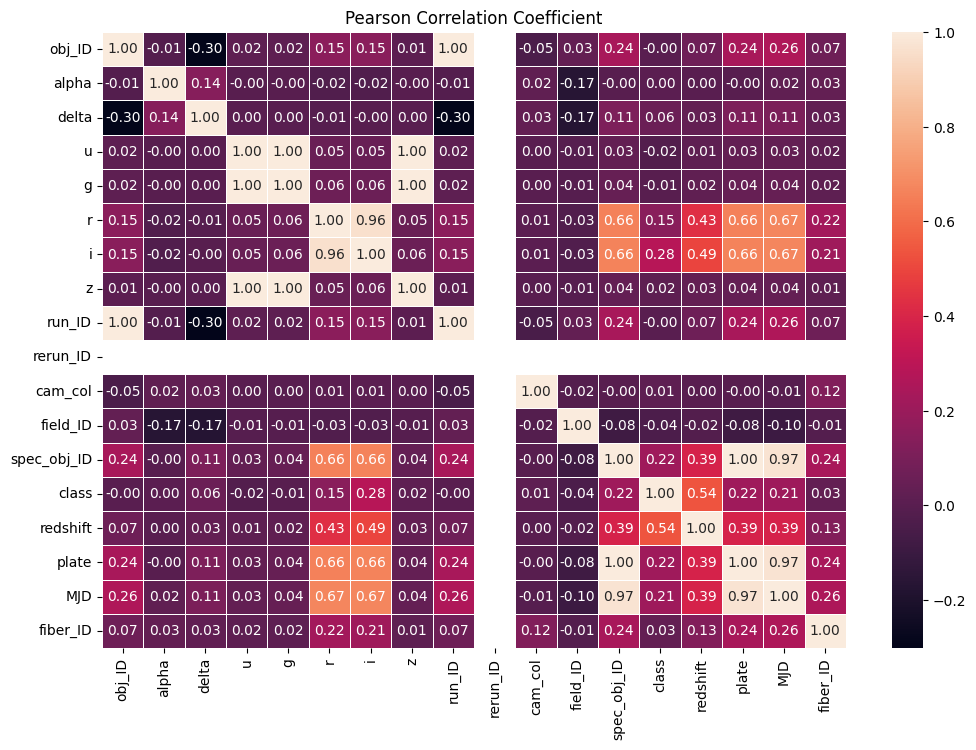

In [25]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_p, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.title('Pearson Correlation Coefficient')
plt.show()

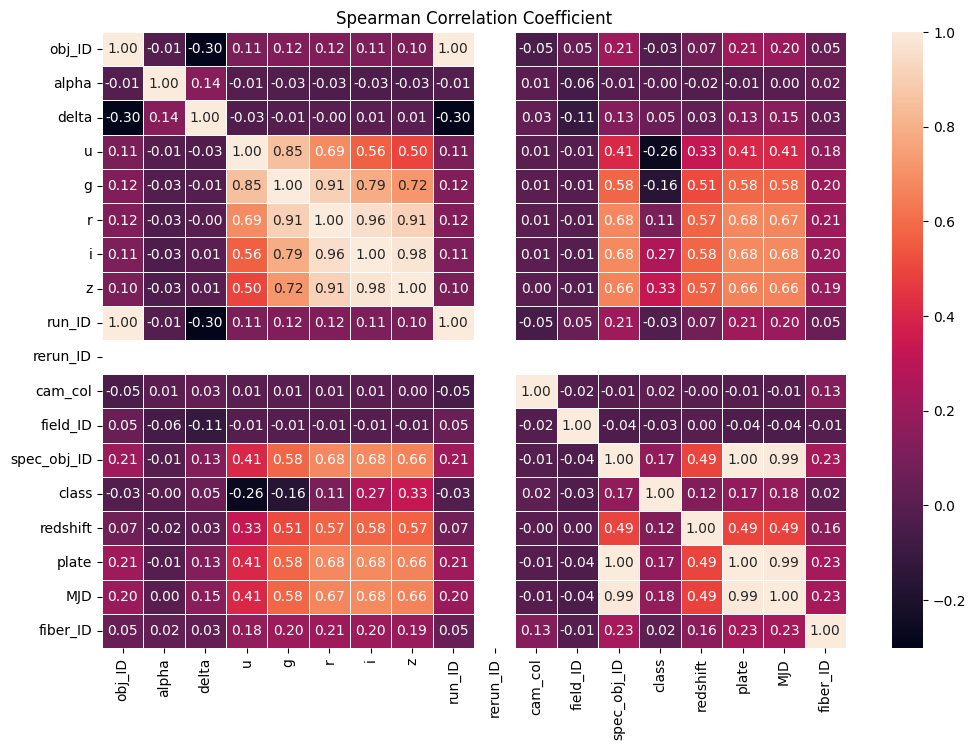

In [26]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_s, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.title('Spearman Correlation Coefficient')
plt.show()

In [27]:
abs(corr_p["class"]).sort_values(ascending = False)

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
field_ID       0.038044
fiber_ID       0.032053
u              0.017701
z              0.017352
cam_col        0.014476
g              0.005915
alpha          0.004552
run_ID         0.000049
obj_ID         0.000047
rerun_ID            NaN
Name: class, dtype: float64

In [28]:
abs(corr_s["class"]).sort_values(ascending = False)

class          1.000000
z              0.329337
i              0.267524
u              0.264597
MJD            0.176147
spec_obj_ID    0.174922
plate          0.174920
g              0.160557
redshift       0.122859
r              0.109295
delta          0.054679
field_ID       0.027690
run_ID         0.025683
obj_ID         0.025652
fiber_ID       0.017087
cam_col        0.015732
alpha          0.000375
rerun_ID            NaN
Name: class, dtype: float64

In [18]:
df.shape[0]
df["class"]

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [19]:
len_data = df.shape[0]
galaxy_ind = []
star_ind = []
qsr_ind = []
indd = []

for i in range(len_data): 
    obj = df["class"][i]
    if obj == 0:
        galaxy_ind.append(i)
    elif obj == 1:
        star_ind.append(i)
    else:
        qsr_ind.append(i)


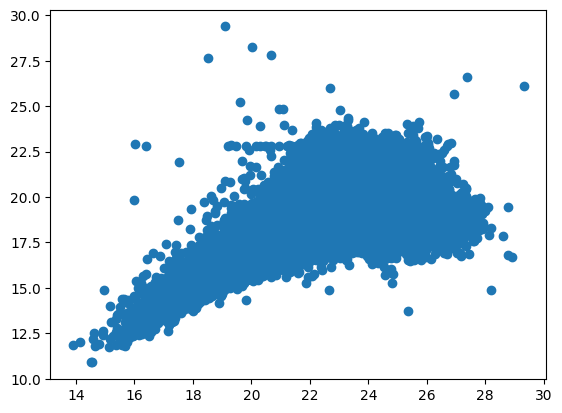

In [36]:
aa = df.loc[galaxy_ind, ["u", "z"]]
plt.scatter(aa["u"], aa["z"])

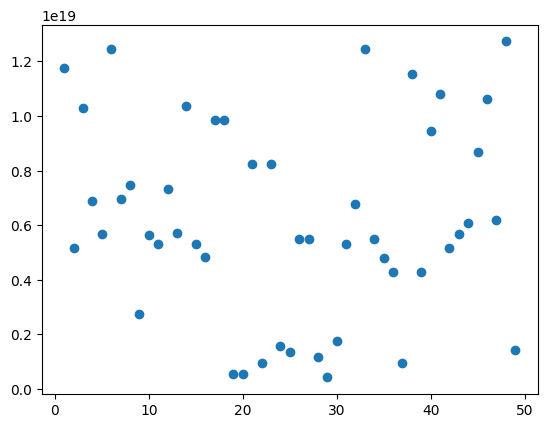

In [43]:
len(set(df["spec_obj_ID"])) == len_data
plt.plot(df["spec_obj_ID"][1:50], "o")

In [29]:
#Features dropped are ['rerun_ID', 'alpha', 'cam_col', 'fiber_ID', 'obj_ID', 'run_ID', 'field_ID', 'delta']

df = df.drop(['rerun_ID', 'alpha', 'cam_col', 'fiber_ID', 'obj_ID', 'run_ID', 'field_ID', 'delta'], axis = 1)

In [30]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [31]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

SVM Classifier

In [33]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

In [34]:
print('Accuracy : %.3f' % (svm_score_*100))

Accuracy : 96.336


Random Forest Classifier

In [35]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

In [36]:
print('Accuracy : %.3f' % (rf_score_*100))

Accuracy : 98.124
